In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('py_sent_idioms.csv')

In [4]:
ordered_columns = ['Idiom', 'Meaning', 
                   'Idiom_POS', 'Meaning_POS', 
                   'Idiom_NEU', 'Meaning_NEU', 
                   'Idiom_NEG', 'Meaning_NEG', 
                  ]

# Create a new DataFrame with the columns reordered
df = df[ordered_columns]
df

,Idiom,Meaning,Idiom_POS,Meaning_POS,Idiom_NEU,Meaning_NEU,Idiom_NEG,Meaning_NEG
0,"A buen hambre, no hay pan duro.",Beggars can’t be choosers.,0.173066,0.005945,0.274419,0.889243,0.552515,0.104812
1,estar como unasopa,to be soaked to the bone,0.086187,0.006524,0.254890,0.821744,0.658922,0.171732
2,estar como un fideo,to be thin as a rail,0.044384,0.019842,0.665327,0.127502,0.290289,0.852656
3,estar como un queso,to be hot (sexually attractive),0.032689,0.919609,0.739185,0.002461,0.228126,0.077930
4,no importar un pepino,to not care at all,0.071704,0.006551,0.690299,0.884299,0.237997,0.109150
...,...,...,...,...,...,...,...,...
2207,volverse loco,go insane; go mad,0.176415,0.080997,0.221591,0.246989,0.601994,0.672014
2208,ya es hora,it's about time,0.394461,0.100869,0.083398,0.014414,0.522141,0.884717
2209,ya que,since; because,0.114031,0.038524,0.269525,0.084565,0.616444,0.876911
2210,yo que se,how would I know? (lit.: I know what?),0.108398,0.011422,0.221676,0.093994,0.669927,0.894585


In [5]:
# Find the index of the maximum sentiment score for each row for English sentiments
df['id_highest_sent'] = df[['Idiom_POS','Idiom_NEU','Idiom_NEG']].idxmax(axis=1)

# Find the index of the maximum sentiment score for each row for Spanish sentiments
df['mean_highest_sent'] = df[['Meaning_POS','Meaning_NEU','Meaning_NEG']].idxmax(axis=1)


df['id_highest_sent'] = df['id_highest_sent'].str.replace('Idiom_', '') 
# Remove the prefix "spa_" from each entry in the 'spa_highest_sent' 
df['mean_highest_sent'] = df['mean_highest_sent'].str.replace('Meaning_', '')

In [6]:
# Calculate the number of matching values
matching_count = (df['id_highest_sent'] == df['mean_highest_sent']).sum()
matching_count

1472

In [7]:
# Create a new DataFrame with the mismatched sentiments, preserving the index
df_mismatches = df[df['id_highest_sent'] != df['mean_highest_sent']].copy()
df_mismatches

,Idiom,Meaning,Idiom_POS,Meaning_POS,Idiom_NEU,Meaning_NEU,Idiom_NEG,Meaning_NEG,id_highest_sent,mean_highest_sent
0,"A buen hambre, no hay pan duro.",Beggars can’t be choosers.,0.173066,0.005945,0.274419,0.889243,0.552515,0.104812,NEG,NEU
1,estar como unasopa,to be soaked to the bone,0.086187,0.006524,0.254890,0.821744,0.658922,0.171732,NEG,NEU
2,estar como un fideo,to be thin as a rail,0.044384,0.019842,0.665327,0.127502,0.290289,0.852656,NEU,NEG
3,estar como un queso,to be hot (sexually attractive),0.032689,0.919609,0.739185,0.002461,0.228126,0.077930,NEU,POS
5,ponerse como un tomate,to blush,0.032296,0.091194,0.818666,0.031631,0.149038,0.877175,NEU,NEG
...,...,...,...,...,...,...,...,...,...,...
2201,valer la pena,be worth; be worthwhile (lit.: to be worth the...,0.583907,0.385162,0.078763,0.022142,0.337331,0.592696,POS,NEG
2203,venir como agua de mayo,come at just the right time; be just what you ...,0.155320,0.856936,0.413841,0.001799,0.430839,0.141265,NEG,POS
2204,venir como anillo al dedo,be a godsend; come at just the right time (lit...,0.334918,0.890428,0.121193,0.001641,0.543889,0.107932,NEG,POS
2205,vivir del paro,live off of unemployment (used in Spain),0.065948,0.007324,0.536260,0.394573,0.397793,0.598103,NEU,NEG


In [8]:
df.dropna(inplace=True)
from scipy import stats

# Assuming df is your DataFrame
# Calculate the differences
df['diff_POS'] = df['Idiom_POS'] - df['Meaning_POS']
df['diff_NEU'] = df['Idiom_NEU'] - df['Meaning_NEU']
df['diff_NEG'] = df['Idiom_NEG'] - df['Meaning_NEG']

# Descriptive statistics
descriptive_stats = df[['diff_POS', 'diff_NEU', 'diff_NEG']].describe()

print("Descriptive Statistics for Differences:")
descriptive_stats


Descriptive Statistics for Differences:


,diff_POS,diff_NEU,diff_NEG
count,2212.000000,2212.000000,2212.000000
mean,0.118566,0.159622,-0.278188
std,0.252086,0.276989,0.329054
min,-0.934391,-0.928602,-0.920212
25%,0.047099,0.062143,-0.481242
50%,0.118142,0.150568,-0.346946
75%,0.222797,0.283382,-0.152491
max,0.853359,0.940824,0.798747


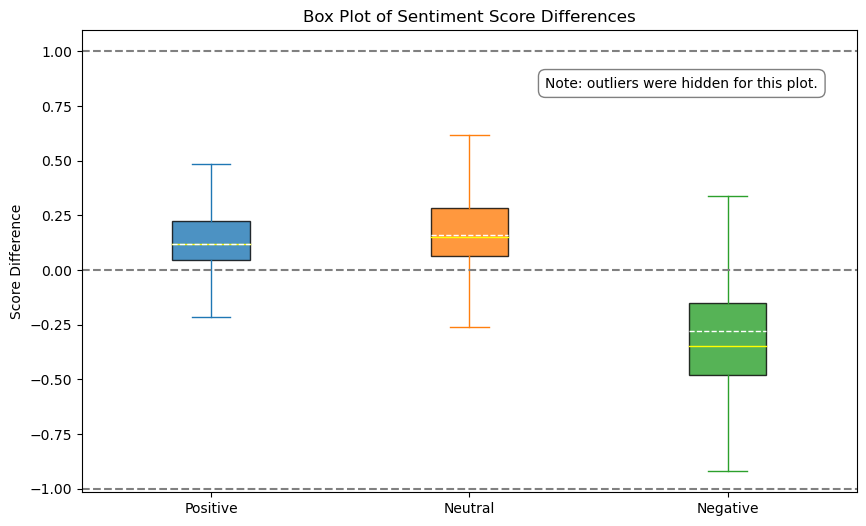

In [9]:
# Define the colors for each sentiment
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue for POS, orange for NEU, green for NEG

# Create box plots with custom colors and mean line, and hide outliers
plt.figure(figsize=(10, 6))
bp = plt.boxplot([df['diff_POS'], df['diff_NEU'], df['diff_NEG']], labels=['Positive', 'Neutral', 'Negative'],
                 patch_artist=True, showmeans=True, meanline=True, showfliers=False)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')

plt.text(0.95, 0.90, 'Note: outliers were hidden for this plot.', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Set the properties of the boxplot elements
for i, color in enumerate(colors):
    plt.setp(bp['boxes'][i], facecolor=color, alpha=0.8)
    plt.setp(bp['whiskers'][2*i:2*i+2], color=color)
    plt.setp(bp['caps'][2*i:2*i+2], color=color)
    # As outliers are hidden, no need to set fliers properties
    plt.setp(bp['means'][i], color='white')
    plt.setp(bp['medians'][i], color='yellow')

plt.title('Box Plot of Sentiment Score Differences')
plt.ylabel('Score Difference')
plt.show()

In [11]:
from scipy.stats import ttest_rel

# Conduct paired t-tests
t_test_POS = ttest_rel(df['Meaning_POS'], df['Idiom_POS'])
t_test_NEU = ttest_rel(df['Meaning_NEU'], df['Idiom_NEU'])
t_test_NEG = ttest_rel(df['Meaning_NEG'], df['Idiom_NEG'])

print(f"Paired T-Test for POS: statistic={t_test_POS.statistic}, p-value={t_test_POS.pvalue}")
print(f"Paired T-Test for NEU: statistic={t_test_NEU.statistic}, p-value={t_test_NEU.pvalue}")
print(f"Paired T-Test for NEG: statistic={t_test_NEG.statistic}, p-value={t_test_NEG.pvalue}")

Paired T-Test for POS: statistic=-22.121008316593638, p-value=4.069617715833243e-98
Paired T-Test for NEU: statistic=-27.10335653124211, p-value=6.355306813152268e-140
Paired T-Test for NEG: statistic=39.76162152769293, p-value=2.6601910533758657e-261


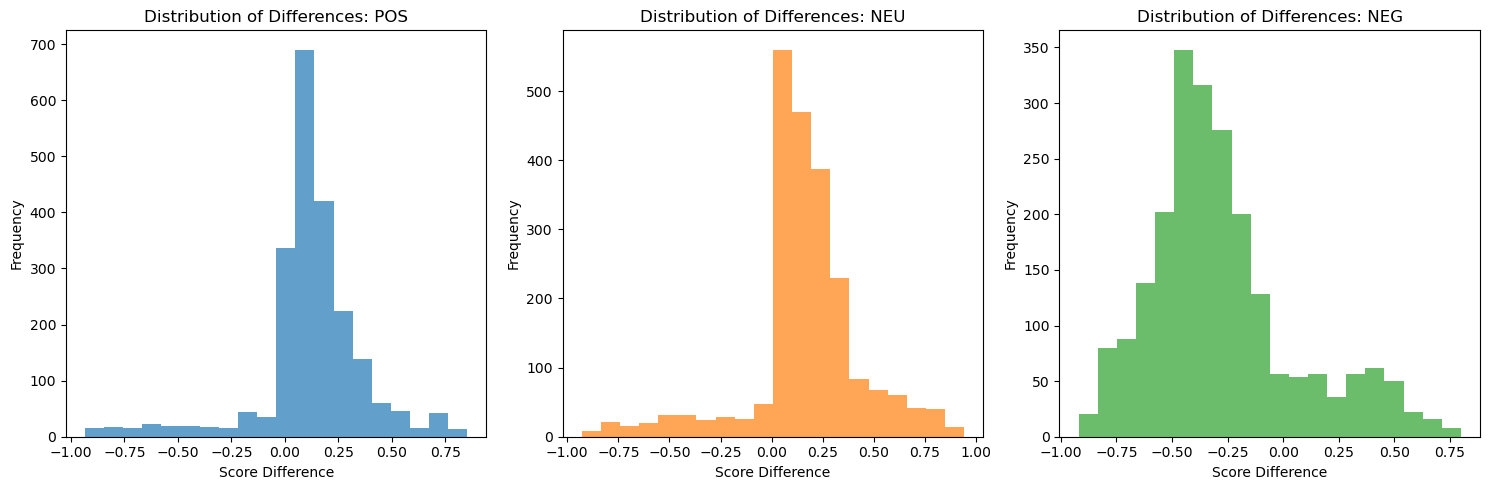

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green

for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    axes[i].hist(df[f'diff_{sentiment}'], bins=20, color=colors[i], alpha=0.7)
    axes[i].set_title(f'Distribution of Differences: {sentiment}')
    axes[i].set_xlabel('Score Difference')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

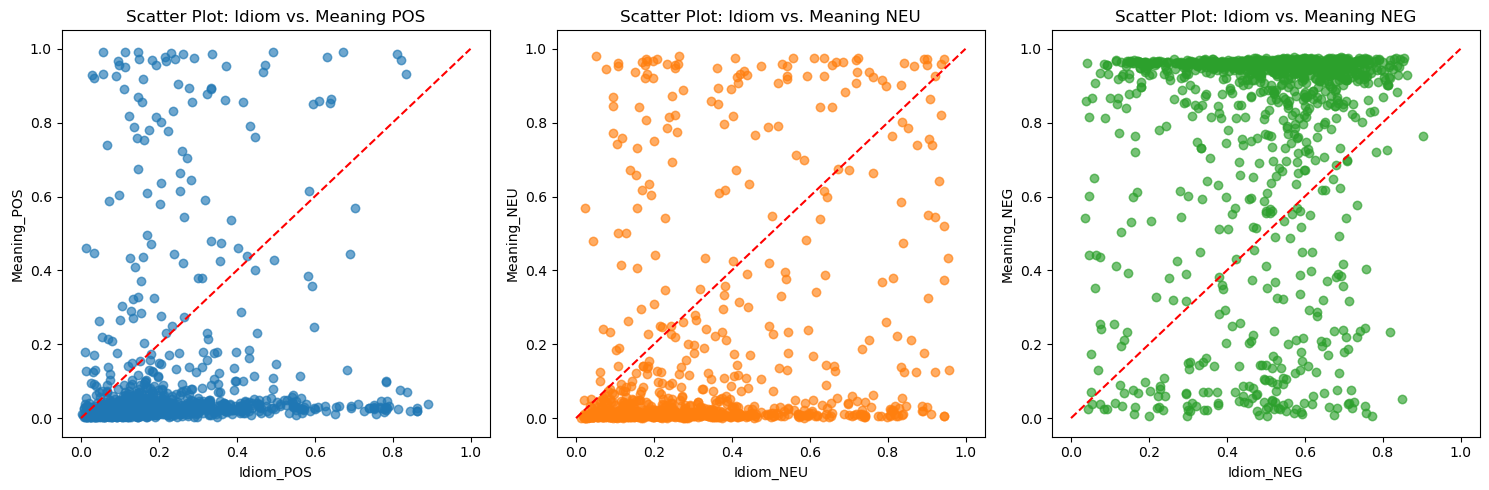

In [13]:
# Plot scatter plots with a line of equality
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, orange, green

for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    axes[i].scatter(df[f'Idiom_{sentiment}'], df[f'Meaning_{sentiment}'],color=colors[i], alpha=0.4)
    axes[i].plot([0, 1], [0, 1], 'r--')  # Line of equality
    axes[i].set_title(f'Scatter Plot: Idiom vs. Meaning {sentiment}')
    axes[i].set_xlabel(f'Idiom_{sentiment}')
    axes[i].set_ylabel(f'Meaning_{sentiment}')

plt.tight_layout()
plt.show()
